여기서는 퍼셉트론 학습 알고리즘이 어떻게 동작하는지를 설명한다.  

# 퍼셉트론 학습 알고리즘의 직관적인 설명

이제 학습 알고리즘이 무엇을 하는지 보자  
```python
for i in range(len(w)):
    w[i] += (y * LEARNING_RATE * x[i])
```
w는 가중치 배열이고  
x는 입력 배열이고  
y는 원하는 출력이다.  

</br>

퍼셉트론이 올바르게 출력을 예측하면 가중치를 조정하지 않는다.  
출력이 틀릴 경우, 가중치를 조정한다.  
그리고 LEARNING_RATE 매개변수를 조합해 계산한다.  
다음 예제를 보자  
```
참고: x0은 언제나 1인 편향 입력이다.

훈련예제 1: x0 = 1, x1 =  0,   x2 = 0,   y =  1
훈련예제 2: x0 = 1, x1 =  0,   x2 = 1.5, y = -1
훈련예제 3: x0 = 1, x1 = -1.5, x2 = 0,   y =  1
```

퍼셉트론의 z값은 다음과 같이 계산한다.
```
z = w0x0 + w1x1 + w2x2
```
가중치와 입력을 곱한 것을 더한 것이다.  
즉, 예제 1은 다음과 같다.  
```
x = (w0 * 1) + (w1 * 0) + (w2 * 0) = w0
```
여기서, w1과 w2는 결과에 영향을 주지 않는다.  
고로 w0만 조정하는 것이 적절하다.  

</br>

훈련예제 2에서 같은 분석을 하면 w0과 w2만 조정될 것이다.  
y가 -1이고 x0과 x2가 양수이므로 둘 다 음의 방향으로 조정될 것이다.  
x2가 x1보다 크므로 w2의 조정 크기는 w0보다 크다.  

</br>

이런 과정을 거치면 다음과 같은 결과를 관찰할 수 있다.  

</br>

1. 편향 가중치는 오직 원하는 출력값에 의해서만 조정된다.  
  - 따라서 원하는 출력의 과반수가 양수냐 음수냐에 따라 결정될 것이다.  
2. 예제들 중 출력에 상당한 영향을 줄 수 있는 가중치만 큰 조정을 받게 된다.  
  - 때문에 입력값이 0인 극단적인 경우, 해당 가중치는 0의 조정을 받을 것이다.  


</br>




---
# 경사 하강으로 학습 문제 풀기

입력값이 주어졌을 때, 그 값이 원하는 출력을 내놓는 가중치를 찾아내야 한다.  
이는 다음과 같이 표기된다.  
```
y - y' = 0
```
여기서 y는 원하는 값, y'은 네트워크가 예측한 값이다.  
그러나 실제로는 0보다 커서 값을 최소화 하는 가중치를 찾는 문제로 다룬다.  

이 문제를 풀기 위해 경사 하강이라 알려진 수치적 방법을 사용한다.  

</br>

도함수는 어떤 방향으로 x를 조정하는지 가리키며  
현재 값이 y를 최소화 하는 값으로 부터 가까운지 아닌지를 알려준다.  

</br>

경사하강법은 x0 으로 시작한다.  
이후 이 값을 함수에 넣고 y 도함수를 계산한다.  
최솟값을 찾지 못했다면, x0값을 살짝 조작한다.  
이런 방식으로 최솟값을 찾아나간다.  
실제 신경망에는 변수가 많기 때문에 다차원 함수를 최소화 하는 능력이 필요하다.  

## 퍼셉트론 학습 알고리즘 설명

다음의 변수가 있다.  
```
w = (w0, w1, w2)
x = (x0, x1, x2)
y
```
w는 가중치, x는 입력, y는 정답이다.  
먼저, 현 가중치가 1을 출력하지만 정답이 -1인 경우를 살펴보자  
우리는 이를 0으로 낮춰야 한다.  
경사 하강을 다음 함수에 적용하여 할 수 있다.  
```
z = x0*w0 + x1*w1 + x2*w2
```
x는 전부 상수이고 가중치는 변수로 취급한다.  

현재 가중치 벡터 W와 기울기 z로 w에서 더 작은 z값이 되게 해야 한다.  


---
# 패턴 식별에 퍼셉트론 사용하기

이 퍼셉트론을 이미지에 적용해보자  

</br>

3 X 3 크기의 9 픽셀 짜리 이미지를 살펴보자  
보다 더 단순하게 하기 위해, 흰색, 회색, 검은색만을 다룰 것이다.  
또한 회색 + 흰색이나 검정 + 회색 + 흰색을 가진 예제는 없다.  
이 또한 예제를 제한 하기 위해서다.  
정리하자면 1023개의 고유한 훈련 예제가 있다.  

</br>

예제에서,  
우리는 학습하길 원하는 패턴에 +1, 그 외 다른 것에는 -1을 정답으로 사용한다.  
여기서 흰색이 1, 회색은 0, 검정은 -1 이다.  



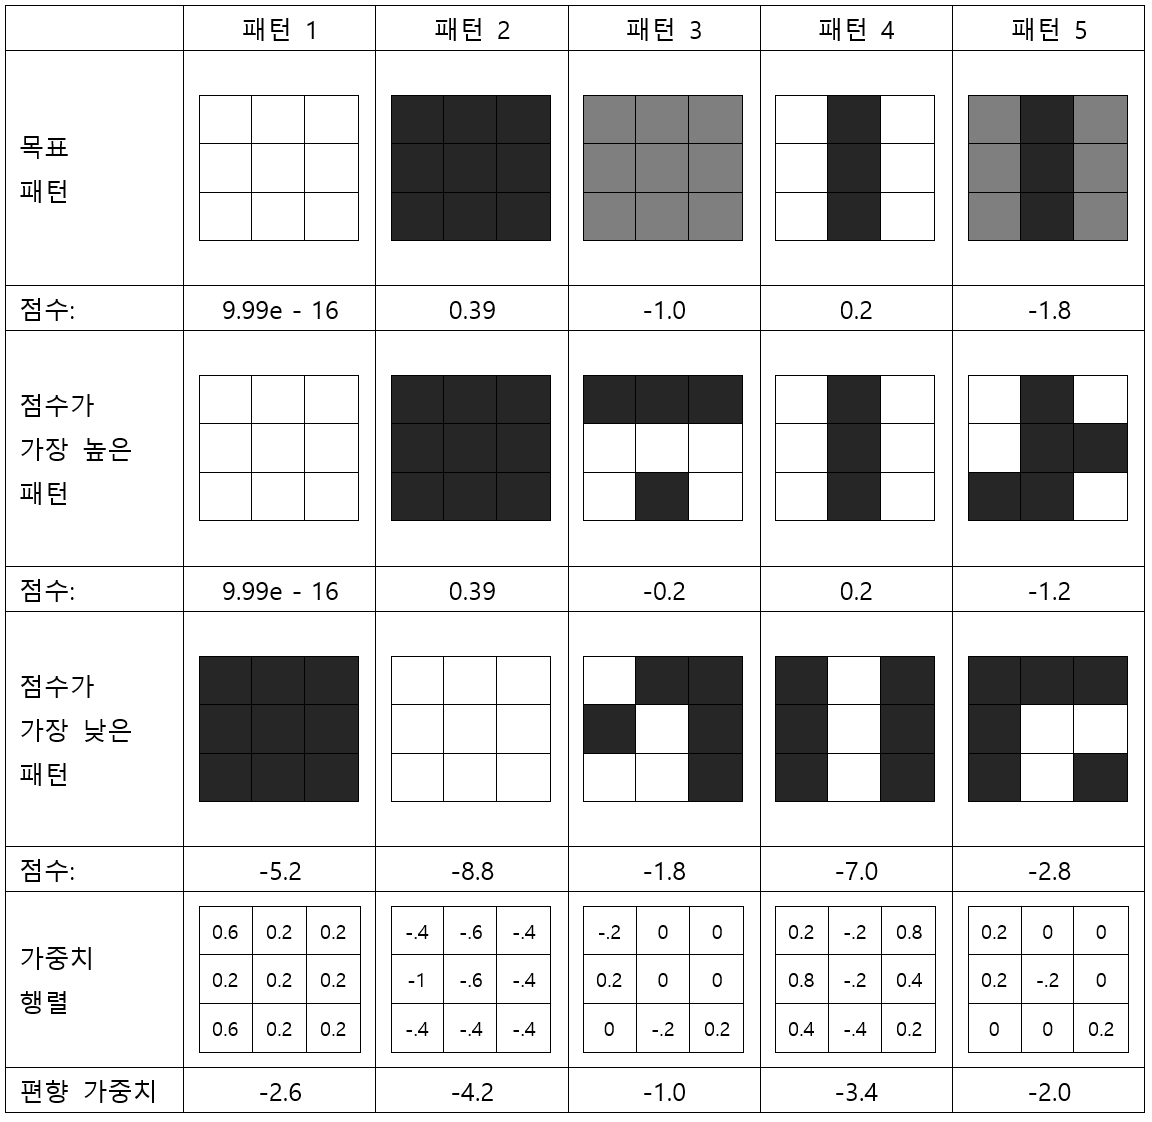

첫 번째 행은 각 퍼셉트론이 식별했으면 하는 패턴이다.  
- 각각의 점수는 훈련 뒤, 퍼셉트론 내 부호 함수의 입력 값이다.  

두 번째 행은 점수가 가장 높은 패턴과 그 점수를 보여준다.  
- 단순히 뉴런에 모든 조합을 제시하고, 가장 높은 점수를 낸 패턴을 보여준다.  
- 그러나 이는 어떠한 실수도 없다는 뜻이 아니다.  
- 예를 들어, 퍼셉트론이 모든 패턴에 높은 점수를 출력할 수 있으며, 이 경우, 거짓 양성이 많아진다.  

세 번째 행은 가장 점수가 낮은 패턴과 그 점수를 보여준다.  

마지막 행은 훈련 후 가중치 및 편향 가중치를 보여준다.

</br>

다음 4가지를 관찰할 수 있다.  
1. 퍼셉트론이 흑색-흰색을 성공적으로 식별한다.  
2. 모두 흰색일 때, 목표 예제의 점수는 0을 겨우 넘긴다.  
3. 입력 패턴이 완벽하게 대칭이라도, 결과 가중치 패턴이 반드시 대칭인건 아니다.  
  - 이는 가중치의 무작위 초기화 및 여러 알고리즘에 의한 결과다.  
4. 픽셀 몇 개가 회색인 경우, 퍼셉트론은 완벽하게 식별하지 못했다.  
  - 이들은 다른 예제들과 선형적 분리가 불가능함을 보여준다.

이로써 패턴 식별자에 대한 실험을 마친다.  

</br>


---
# 맺음말

지금까지 개별 퍼셉트론에 집중했다.  
이제는 다수준 네트워크로 바꿔 집중할 때다.  
다음 장의 주 주제는 어떻게 학습 알고리즘을 이러한 네트워크로 확장하는가 이다.  
